In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airlines=pd.read_excel('D:\\excler\\Assignment\\Forecasting\\Airlines+Data.xlsx')
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month=pd.DataFrame(month)
months=pd.DataFrame(np.tile(month,(8,1)))
Airlines=pd.concat([airlines,months],axis=1)
Airlines.columns=['Month','Passengers','months']

In [4]:
month_dummies=pd.get_dummies(Airlines['months'])
Airlines=pd.concat([Airlines,month_dummies],axis=1)
Airlines['t']=np.arange(1,97)
Airlines['t_sq']=Airlines['t']*Airlines['t']
Airlines['log_passengers']=np.log(Airlines['Passengers'])

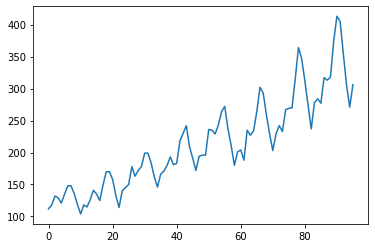

In [5]:
Train=Airlines[0:85]
Test=Airlines[85:]
plt.plot(Airlines.iloc[:,1])
Test.set_index(np.arange(1,12),inplace=True)

In [6]:
import statsmodels.formula.api as smf
lin_model=smf.ols('Passengers~t',data=Train).fit()
predict_lin=lin_model.predict(Test['t'])
error_lin=Test['Passengers']-predict_lin
rmse_lin=np.sqrt(np.mean(error_lin**2))
rmse_lin

55.674170015416216

In [7]:
exp_model=smf.ols('log_passengers~t',data=Train).fit()
predict_exp=exp_model.predict(Test['t'])
error_exp=Test['Passengers']-predict_exp
rmse_exp=np.sqrt(np.mean(error_exp**2))
rmse_exp

329.69175113922927

In [8]:
quad_model=smf.ols('Passengers~t+t_sq',data=Train).fit()
predict_quad=quad_model.predict(Test[['t','t_sq']])
error_quad=Test['Passengers']-predict_quad
rmse_quad=np.sqrt(np.mean(error_quad**2))
rmse_quad

50.65954577650039

In [9]:
add_sea_model=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
predict_add_sea=add_sea_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
error_add_sea=Test['Passengers']-predict_add_sea
rmse_add_sea=np.sqrt(np.mean(error_add_sea**2))
rmse_add_sea

134.34479910432762

In [10]:
add_sea_quad_model=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+t+t_sq',data=Train).fit()
predict_add_sea_quad=add_sea_quad_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',
                                                      't','t_sq']])
error_add_sea_quad=Test['Passengers']-predict_add_sea_quad
rmse_add_sea_quad=np.sqrt(np.mean(error_add_sea_quad**2))
rmse_add_sea_quad

27.4127149612075

In [11]:
mul_sea_model=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
predict_mul_sea=mul_sea_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
error_mul_sea=Test['Passengers']-predict_mul_sea
rmse_mul_sea=np.sqrt(np.mean(error_mul_sea**2))
rmse_mul_sea

330.1926780196679

In [12]:
mul_add_sea_model=smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
predict_mul_add_sea=mul_add_sea_model.predict(Test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
error_mul_add_sea=Test['Passengers']-predict_mul_add_sea
rmse_mul_add_sea=np.sqrt(np.mean(error_mul_add_sea**2))
rmse_mul_add_sea

329.66032649959925

In [13]:
data={'model':['lin_model','exp_model','quad_model','add_sea','add_sea_quad','mul_sea','mul_add_sea'],
      'rmse_val':[rmse_lin,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea]}
rmse_table=pd.DataFrame(data)
rmse_table

,model,rmse_val
0,lin_model,55.674170
1,exp_model,329.691751
2,quad_model,50.659546
3,add_sea,134.344799
4,add_sea_quad,27.412715
5,mul_sea,330.192678
6,mul_add_sea,329.660326
